In [1]:
import torch, torchvision

# Define a tensor

In [4]:
a1 = torch.tensor([3])
a2 = torch.zeros(3,2)
a3 = torch.tensor([[1,2],[2,3],[3,4]])

print(a1)
print(a2)
print(a3)

a3.shape  #torch.size

f1 = torch.FloatTensor([2.0])
f1.stride()
a3.transpose(0, 1)


tensor([3])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1, 2],
        [2, 3],
        [3, 4]])


tensor([[1, 2, 3],
        [2, 3, 4]])

# Storage

In [5]:
a_strg = a3.storage()
print(a_strg)
print(a3.storage_type())

 1
 2
 2
 3
 3
 4
[torch.LongStorage of size 6]
<class 'torch.LongStorage'>


# transpose

In [46]:
a3_transpose = a3.t()
print(a3_transpose.storage())
print(a3.storage())

print(">>", id(a3.storage()) == id(a3_transpose.storage())) # They are the same in the Memory
print(id(a3) == id(a3_transpose)) # They are the same in the Memory

# Contigous Memory
print(a3.is_contiguous())
print(a3_transpose.is_contiguous())

 2
 2
 2
 3
 3
 4
[torch.LongStorage of size 6]
 2
 2
 2
 3
 3
 4
[torch.LongStorage of size 6]
>> True
False
True
False


# Data Type

In [7]:
array_float16 = torch.ones(10, 2, dtype = torch.float16)
array_character = torch.ones(10, 2, dtype = torch.int8)
array_int16 = torch.ones(10, 2).double()

# Indexing Tensors

In [40]:
print(a3[:])
print(a3[0:2])
a3_copy = a3.clone()
# a3_mrg = torch.cat(a3, a3_copy, 0)
print(a3[:-1])
print(a3[:-2])
print(a3[-3:])
a3_copy


tensor([[1, 2],
        [2, 3],
        [3, 4]])
tensor([[1, 2],
        [2, 3]])
tensor([[1, 2],
        [2, 3]])
tensor([[1, 2]])
tensor([[1, 2],
        [2, 3],
        [3, 4]])


tensor([[1, 2],
        [2, 3],
        [3, 4]])

# Convert TO Numpy

In [42]:
# Interestingly They do not Copy the Data
a3_np = a3.numpy()
a3[0][0] = 2
print(a3_np)
id(a3.storage()) == id(a3_np.storage())

[[2 2]
 [2 3]
 [3 4]]


AttributeError: 'numpy.ndarray' object has no attribute 'storage'

In [14]:
a = torch.ones(3, 4)
a.t_()
a

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [98]:
x = torch.tensor([[1,2,3,4],[1,2,4,4]])

In [100]:
x_0 = torch.unsqueeze(x, 0)
x_1 = torch.unsqueeze(x, 1)
print(x.shape)
print(x_0.shape)
print(x_1.shape)
print(x[0].shape)
print(x_0[0].shape)
print(x_1[0][0].shape)
x_0[0].shape

torch.Size([2, 4])
torch.Size([1, 2, 4])
torch.Size([2, 1, 4])
torch.Size([4])
torch.Size([2, 4])
torch.Size([4])


torch.Size([2, 4])

# Real Data 

In [121]:
import numpy as np
import csv

In [122]:
wine_path = './winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype = np.float32, delimiter = ";", skiprows=1)

wineq_numpy.shape
type(wineq_numpy)

numpy.ndarray

In [123]:
col_list = next(csv.reader(open(wine_path), delimiter = ";"))
type(col_list)
len(col_list)
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [124]:
wineq = torch.from_numpy(wineq_numpy)
wineq.type
wineq[:,11].unsqueeze(0)

tensor([[6., 6., 6.,  ..., 6., 7., 6.]])

In [125]:
x = torch.tensor([[[2,4],[5,6],[7,7]],
                  [[1,4],[5,6],[7,7]],
                  [[2,4],[5,6],[8,7]]])
x = x.float()
x[:,1]

tensor([[5., 6.],
        [5., 6.],
        [5., 6.]])

In [130]:
labels = wineq[:,-1].long()
data = wineq[:,:-1]

labels_onehot = torch.zeros(labels.shape[0], 10) 
labels_onehot.scatter_(1, labels.unsqueeze(1), 1.0)
print(labels.unsqueeze(1)[234])
labels_onehot[233]

tensor([6])


tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
data_mean = torch.mean(data, dim = 0) # dim=0 >> the dimension in which rows are distibuted. yet, the dimension 1 is related to different columns.
print(data_mean)
data.shape
data_normalized = (data - data_mean)/torch.sqrt(torch.var(data, dim = 0))

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])


In [15]:
bad_indexes = torch.le(labels, 3)
mid_indexes = [torch.gt(labels, 3) & torch.le(labels, 7)]
good_indexes = [torch.gt(labels, 7)]

In [48]:
bad_data = data[bad_indexes]
mid_data = data[mid_indexes]
good_data = data[good_indexes]

bad_mean = torch.mean(bad_data, dim = 0)
mid_mean = torch.mean(mid_data, dim = 0)
good_mean = torch.mean(good_data, dim = 0)

bad_mean.shape

torch.Size([11])

In [52]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.86   6.68
 1 volatile acidity       0.33   0.28   0.28
 2 citric acid            0.34   0.33   0.33
 3 residual sugar         6.39   6.42   5.63
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.18  36.63
 6 total sulfur dioxide 170.60 138.70 125.88
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.19   3.22
 9 sulphates              0.47   0.49   0.49
10 alcohol               10.34  10.47  11.65


In [72]:
predicted_indices = torch.lt(data[:,6], mid_mean.unsqueeze(1)[6])
predicted_indices.shape

torch.Size([4898])

In [92]:
actual_indices = labels > 5.0
actual_indices.sum()

tensor(3258)

In [93]:
print((actual_indices & predicted_indices).sum().item() / predicted_indices.sum().item())

0.7391138273491215


In [82]:
(actual_indices & predicted_indices).sum().item()

2509

# Time Series, Bike Sharing data set

In [152]:
bikes_numpy = np.loadtxt("./Bike-Sharing-Dataset/hour.csv", delimiter = ",", skiprows = 1, dtype = np.float32, converters = {1: lambda x: float(x[8:10])})

bikes = torch.from_numpy(bikes_numpy)
bikes = torch.cat((bikes, bikes[:141, :]), dim = 0) #my data set had 17379 instead of 17530, added fake rows to reach 17520
bikes.shape

import csv
column_list = next(csv.reader(open("./Bike-Sharing-Dataset/hour.csv"), delimiter= ","))
print(column_list)

daily_bikes = bikes.view(-1, 24, bikes.shape[1])

print(daily_bikes.shape)
daily_bikes.stride()

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
torch.Size([730, 24, 17])


(408, 17, 1)

In [153]:
daily_bikes.transpose(1, 2).shape


torch.Size([730, 17, 24])

# Text processing 

# Character to vec

In [226]:
with open('./1342-0.txt', encoding = 'utf-8') as f:
    text = f.read()

lines = text.split('\n')
line = lines[198].lower()
line

char_tensor = torch.zeros(len(line.lower().strip()), 128)

asc_codes = []
for l in line.lower().strip():
    asc_codes.append(ord(l))

char_tensor.scatter_(1, torch.tensor(asc_codes).unsqueeze(1), 1.0) #Book has written this line of code in another way

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [305]:
def clean_text(text):
    text = text.lower()
    punctuations = ',.;:"?!#_-"'
    clean_text = text.replace('\n', ' ').split()
    clean_text_words = [word.strip(punctuations) for word in clean_text]
    return clean_text_words

words_in_line = clean_text(line)
words_in_line

word2index_map = {word: i for(i, word) in enumerate(sorted(set(clean_text(text))))}
word2index_map

word_indices = []

for key in words_in_line:
    word_indices.append(word2index_map[key])

word_indices
words_tensor = torch.zeros(len(word_indices), len(set(clean_text(text))))
word_tensor.shape
words_tensor.scatter_(1, torch.tensor(word_indices).unsqueeze(1), 1.0)

words_tensor.shape
# torch.tensor(word_indices).unsqueeze(1)

len(word_indices), len(words_in_line)
for i, args in enumerate(zip(words_in_line, word_indices)):
    print('{:} {:5}'.format(*args))

place  5538
and   464
was  7922
so  6827
much  4897
delighted  1953
with  8085
it  4141
that  7314
he  3511
agreed   363
with  8085
mr  4895


# Image

In [330]:
import imageio
img_arr1 = imageio.imread('./PetImages/Cat/92.jpg')
img_arr2 = imageio.imread('PetImages/Cat/23.jpg')
img_arr1.shape, img_arr2.shape

# img = torch.from_numpy(img_arr)
# img_trns = torch.transpose(img, 0, 2)
# img_trns.shape # (Channels, Height, Width)


((375, 500, 3), (257, 334, 3))

In [328]:
batch_size = 100
batch = torch.zeros(batch_size, img_trns.shape[0], img_trns.shape[1])

# Chapter 7

# Building a Image Classifier

# Data preProcessing
### CIFAR 10

In [129]:
import torchvision
from torchvision import datasets

path = './cifar/cifar10/'
cifar10_train = datasets.CIFAR10(path, download = True, train = True)
cifar10_val = datasets.CIFAR10(path, download = True, train = False)

Files already downloaded and verified
Files already downloaded and verified


In [11]:
type(cifar10_train).__mro__ # __mro__ is a function stands for Method Resolution Order, returns ordered parents of Class
len(cifar10_train), len(cifar10_valid)

(50000, 10000)

In [3]:
import pickle
meta = pickle.load(open('./cifar/cifar10/cifar-10-batches-py/batches.meta', 'rb'))
class_names = meta['label_names']

img, label = cifar10_train[2]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F1F26DFB9B0>, 9, 'truck')

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

## it is required to transform the image we have Loaded into a tensor

In [5]:
from torchvision import transforms

### there are two ways to do a transformation, First:

In [6]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

### Second way: change the code in which  we load the data in this way:

In [130]:
tensor_cifar10_train = torchvision.datasets.CIFAR10(path, train = True, download = True, transform = transforms.ToTensor())
tensor_cifar10_val = torchvision.datasets.CIFAR10(path, train = False, download = True, transform = transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [8]:
t_img_t, _ = tensor_cifar10_train[2]
template = t_img_t
t_img_t.shape

torch.Size([3, 32, 32])

## Show tensors using matplotlib

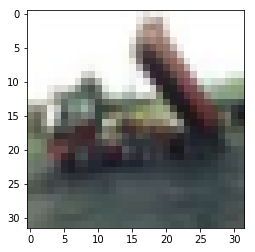

In [9]:
plt.imshow(t_img_t.permute(1,2,0))

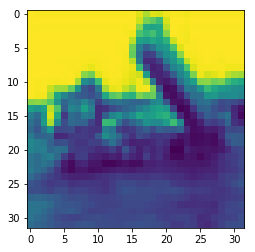

In [10]:
## Tricky point I myself noticed :)
## this line of code could be also helpful to get an image, only ONE CHANNEL OF IT
plt.imshow(t_img_t[0]) # =~ plt.imshow(t_img_t[1]) =~ plt.imshow(t_img_t[2])

## Normalization

tensor(1.) tensor(0.0784)


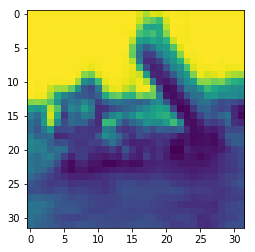

In [11]:
cell_min, cell_max = t_img_t.min(), t_img_t.max()
print(cell_max, cell_min)
t_img_t /= cell_max-cell_min
t_img_t.min(), t_img_t.max()
plt.imshow(t_img_t[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


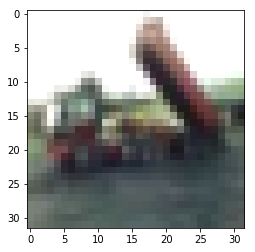

In [12]:
plt.imshow(t_img_t.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


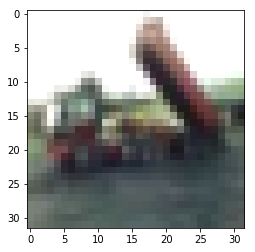

In [13]:
plt.imshow(template.permute(1,2,0))

In [14]:
images = torch.stack([image_t for image_t, _ in tensor_cifar10_train], dim = 3)
images.shape

torch.Size([3, 32, 32, 50000])

In [15]:
images.shape, images.view(3, -1).shape

(torch.Size([3, 32, 32, 50000]), torch.Size([3, 51200000]))

In [16]:
mean = torch.mean(images.view(3, -1), dim = 1) ## Dimension argument(dim) means that: keep the other dimensions fixed 
                                                # and Calculate a Sigma over the index which iterates 
mean                                            # over the dimension of dim = 1 
var = torch.var(images.view(3, -1), dim = 1)
std = torch.sqrt(var)
mean, std

(tensor([0.4915, 0.4823, 0.4468]), tensor([0.2470, 0.2435, 0.2616]))

In [17]:
normalized_transformed_cifar10_train = torchvision.datasets.CIFAR10(path, download = True, train = True, 
                                                                   transform = transforms.Compose([
                                                                       transforms.ToTensor(),
                                                                       transforms.Normalize(mean = (0.4915, 0.4823, 0.4468),
                                                                                           std = (0.2470, 0.2435, 0.2616)
                                                                                           )
                                                                   ]))


Files already downloaded and verified


In [18]:
val_images = torch.stack([img for img, label in tensor_cifar10_val], dim = 3)
val_images.shape

val_mean = torch.mean(val_images.view(3, -1), dim = 1)
val_std = torch.std(val_images.view(3, -1), dim = 1)
val_mean, val_std

normalized_transformed_cifar10_val = torchvision.datasets.CIFAR10(path, download = True, train = False, 
                                                                 transform = transforms.Compose([
                                                                     transforms.ToTensor(),
                                                                     transforms.Normalize(mean = (0.4943, 0.4852, 0.4506),
                                                                                         std = (0.2467, 0.2429, 0.2616))
                                                                 ]))

Files already downloaded and verified


In [19]:
type(normalized_transformed_cifar10_train).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [20]:
n_t_img, n_t_label = normalized_transformed_cifar10_train[99]
n_t_img, n_t_label, class_names[n_t_label]

(tensor([[[-1.0055, -1.1960, -1.2595,  ...,  0.6615,  0.9156,  0.1852],
          [-0.9896, -1.1167, -1.1643,  ...,  0.5980,  0.7251,  0.3123],
          [-1.0690, -0.9738, -1.1008,  ...,  0.4393,  0.3916, -0.0370],
          ...,
          [ 0.7409,  0.2805,  0.0741,  ..., -0.4975,  0.2487,  0.2170],
          [ 0.9156,  0.3916, -0.7197,  ..., -0.7039,  0.1535,  0.2805],
          [ 1.3284,  0.8997,  0.2170,  ..., -1.0531,  0.0741,  0.6933]],
 
         [[-0.9500, -1.1754, -1.2721,  ...,  0.7894,  0.9826,  0.2096],
          [-0.9339, -1.1271, -1.1754,  ...,  0.7410,  0.8216,  0.3706],
          [-0.9822, -0.9178, -1.0144,  ...,  0.5156,  0.4995,  0.0807],
          ...,
          [ 0.1935, -0.2091, -1.0788,  ..., -0.7728, -0.2414, -0.2897],
          [ 0.3706, -0.0803, -0.9500,  ..., -0.8211, -0.0803,  0.0324],
          [ 0.8216,  0.4512, -0.2253,  ..., -1.1110, -0.0642,  0.5317]],
 
         [[-1.0484, -1.3182, -1.4231,  ..., -0.6736, -0.5687, -0.6286],
          [-1.1533, -1.3182,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

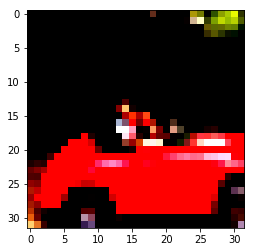

In [21]:
plt.imshow(n_t_img.permute(1, 2, 0))
plt.show

## Save a Tensor in a file

In [ ]:
n_t_cifar10 = open('./cifar/cifar10/n_t_cifar10.pt', 'wb')
torch.save(normalized_transformed_cifar10_train, n_t_cifar10)

## Bird vs Plane classifier

### make a dataset, a subset of Cifar10

In [137]:
class_names_cifar2 = {0:'airplane', 1:'bird'}
desired_labels = [class_names.index('airplane'), class_names.index('bird')]
label_map = {class_names.index('airplane'):0, class_names.index('bird'):1}
cifar2_train = [(n_t_img, label_map[label]) for n_t_img, label in normalized_transformed_cifar10_train if label in desired_labels]
cifar2_val = [(n_t_img, label_map[label]) for n_t_img, label in normalized_transformed_cifar10_val if label in desired_labels]

len(cifar2_train), len(cifar2_val)


(10000, 2000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


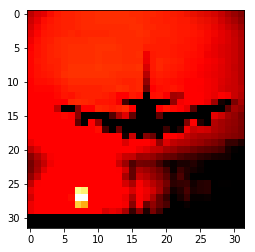

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
airplane


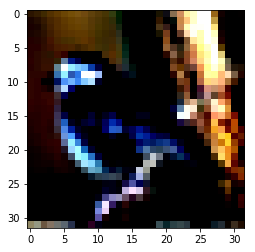

1
bird


In [23]:
img, label = cifar2_train[1580]
plt.imshow(img.permute(1,2, 0))
plt.show()
print(label)
print(class_names_cifar2[label])

img, label = cifar2_train[254]
plt.imshow(img.permute(1,2, 0))
plt.show()
print(label)
print(class_names_cifar2[label])


## Running the Model

In [24]:
import torch.nn as nn

In [ ]:
hyp_lr = 1e-2
hyp_n_out = 2
hyp_epochs_num = 50
hyp_batch_size = 64

In [ ]:
model = nn.Sequential(nn.Linear(hyp_input_nodes, 1024),
                     nn.Tanh(),
                     nn.Linear(1024, 512),
                     nn.Tanh(),
                     nn.Linear(512, hyp_n_out),
                     nn.LogSoftmax(dim = 1))
model.parameters()

In [138]:
out = model(cifar2_train[0][0].view(-1).unsqueeze(0))
out

tensor([[-0.6388, -0.7506]], grad_fn=<LogSoftmaxBackward>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


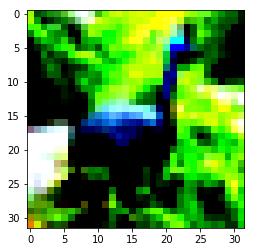

In [139]:
plt.imshow(cifar2_train[0][0].permute(1,2, 0))

## Finally, Runnig the model

In [ ]:
import torch.optim as optim

loss_fn = nn.NLLLoss()
loss = loss_fn(out, torch.tensor([label]))
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [161]:
for epoch in range(hyp_epochs_num):
    for img, label in cifar2_train:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Epoch num: %d, Loss: %f' % (epoch, float(loss)))

Epoch num: 0, Loss: 1.660339
Epoch num: 1, Loss: 4.721697
Epoch num: 2, Loss: 2.819386
Epoch num: 3, Loss: 2.796051
Epoch num: 4, Loss: 2.327936
Epoch num: 5, Loss: 1.995280
Epoch num: 6, Loss: 5.317075
Epoch num: 7, Loss: 6.231163
Epoch num: 8, Loss: 3.778499
Epoch num: 9, Loss: 7.536427
Epoch num: 10, Loss: 2.925350
Epoch num: 11, Loss: 1.773333
Epoch num: 12, Loss: 6.222112
Epoch num: 13, Loss: 3.270019
Epoch num: 14, Loss: 8.361753
Epoch num: 15, Loss: 2.193019
Epoch num: 16, Loss: 4.857900
Epoch num: 17, Loss: 9.218220
Epoch num: 18, Loss: 6.480340
Epoch num: 19, Loss: 10.923927
Epoch num: 20, Loss: 6.389400
Epoch num: 21, Loss: 15.912064
Epoch num: 22, Loss: 5.632382
Epoch num: 23, Loss: 13.501179
Epoch num: 24, Loss: 8.862185
Epoch num: 25, Loss: 13.259976
Epoch num: 26, Loss: 5.938856
Epoch num: 27, Loss: 7.536319


KeyboardInterrupt: 

## miniBatches

In [162]:
train_loader = torch.utils.data.DataLoader(cifar2_train, shuffle=True, batch_size=hyp_batch_size)

# for data in train_loader:
#     print(data[1][0])

for epoch in range(hyp_epochs_num):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(-1, 3072))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch num: %d, Loss: %f' % (epoch, float(loss)))

Epoch num: 0, Loss: 0.805426
Epoch num: 1, Loss: 0.014780
Epoch num: 2, Loss: 0.283840
Epoch num: 3, Loss: 0.117682
Epoch num: 4, Loss: 0.108931
Epoch num: 5, Loss: 0.052263
Epoch num: 6, Loss: 0.056003
Epoch num: 7, Loss: 0.046064
Epoch num: 8, Loss: 0.258220
Epoch num: 9, Loss: 0.093459
Epoch num: 10, Loss: 0.427987
Epoch num: 11, Loss: 0.187854
Epoch num: 12, Loss: 0.130065
Epoch num: 13, Loss: 0.230779
Epoch num: 14, Loss: 0.185766
Epoch num: 15, Loss: 0.039481
Epoch num: 16, Loss: 0.043945
Epoch num: 17, Loss: 0.360585
Epoch num: 18, Loss: 0.148764
Epoch num: 19, Loss: 0.123907
Epoch num: 20, Loss: 0.122181
Epoch num: 21, Loss: 0.086040
Epoch num: 22, Loss: 0.011506
Epoch num: 23, Loss: 0.017615
Epoch num: 24, Loss: 0.095346
Epoch num: 25, Loss: 0.034700
Epoch num: 26, Loss: 0.039458
Epoch num: 27, Loss: 0.271777
Epoch num: 28, Loss: 0.071918
Epoch num: 29, Loss: 0.007758
Epoch num: 30, Loss: 0.141968
Epoch num: 31, Loss: 0.183768
Epoch num: 32, Loss: 0.027383
Epoch num: 33, Loss:

## Validation

In [166]:
total = 0
correct = 0

for imgs, labels in torch.utils.data.DataLoader(cifar2_val, shuffle=False, batch_size=64):
    outputs = model(imgs.view(-1, 3072))
    _, predicted = torch.max(outputs, dim = 1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
print("Accuracy: %f", correct/total)

Accuracy: %f 0.793


In [173]:
## a tricky difference between a list in python and its corresponding tensor
a = [1,2,3,45,5,56,7]
b = [0,2,3,4, 5,5,7]

(a==b), int((torch.tensor(a) == torch.tensor(b)).sum())

(False, 4)

### Number of model's paramters

In [180]:
sum([p.numel() for p in model.parameters()]),
sum([p.numel() for p in model.parameters() if p.requires_grad == True]) # Trainable parameters

layer = nn.Linear(3072, 512)
layer.weight.shape, layer.bias.shape # Computing the number of weight and bias parameters in a Layer

(torch.Size([512, 3072]), torch.Size([512]))